In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [2]:
image = cv2.imread("new_test_image_3.jpg")
cv2.imshow("image",image)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("gray",gray_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
blured_image = cv2.GaussianBlur(image,(7,7),0)

In [7]:
threshold_low = 10
threshold_high = 200

canny_image = cv2.Canny(blured_image,threshold_low,threshold_high)
cv2.imshow("Canny",canny_image)
cv2.waitKey()
cv2.destroyAllWindows()

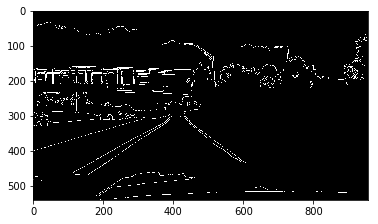

In [10]:
plt.imshow(canny_image,cmap="gray")

In [13]:
blured_image.shape

(540, 956, 3)

In [38]:
vertices = np.array([[(20,460),(340, 300), (460, 300), (740,460)]], dtype=np.int32)
mask = np.zeros_like(image)
cv2.fillPoly(mask,vertices,255)
masked_image = cv2.bitwise_and(image,mask)
cv2.imshow("mask",masked_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [40]:
mask = np.zeros_like(canny_image)
cv2.fillPoly(mask,vertices,255)
masked = cv2.bitwise_and(canny_image,mask)
cv2.imshow("masked canny",masked)
cv2.waitKey()
cv2.destroyAllWindows()

In [48]:
rho = 2
theta = np.pi/180
threshold = 40
min_line_len = 100
max_line_gap = 50
lines = cv2.HoughLinesP(masked,rho,theta,threshold,np.array([]), minLineLength = min_line_len,maxLineGap = max_line_gap)

line_image = np.zeros((masked.shape[0],masked.shape[1],3), dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),[255,0,0],20)
lines

array([[[228, 397, 389, 311]],

       [[169, 460, 387, 313]],

       [[419, 301, 608, 433]],

       [[474, 345, 576, 422]],

       [[140, 448, 273, 372]],

       [[505, 362, 606, 433]],

       [[266, 393, 374, 325]]], dtype=int32)

In [49]:
a = 1
b = 1
y = 0
image_with_lines = cv2.addWeighted(image,a,line_image,b,y)
cv2.imshow("result",image_with_lines)
cv2.waitKey()
cv2.destroyAllWindows()